In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/weatherAUS.csv") 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Tests autour de la station Albury: détecter les nan

In [2]:
############ Création d'un df pour la station 'Albury'

albury = df.loc[df['Location'] == 'Albury']
albury.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
albury.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 0 to 3039
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3040 non-null   object 
 1   Location       3040 non-null   object 
 2   MinTemp        3029 non-null   float64
 3   MaxTemp        3029 non-null   float64
 4   Rainfall       3011 non-null   float64
 5   Evaporation    0 non-null      float64
 6   Sunshine       0 non-null      float64
 7   WindGustDir    3008 non-null   object 
 8   WindGustSpeed  3008 non-null   float64
 9   WindDir9am     2515 non-null   object 
 10  WindDir3pm     2994 non-null   object 
 11  WindSpeed9am   3031 non-null   float64
 12  WindSpeed3pm   3029 non-null   float64
 13  Humidity9am    3031 non-null   float64
 14  Humidity3pm    3032 non-null   float64
 15  Pressure9am    3035 non-null   float64
 16  Pressure3pm    3032 non-null   float64
 17  Cloud9am       1289 non-null   float64
 18  Cloud3pm     

In [4]:
nan_rate = []
for col in albury.columns:
    nan_rate.append([col,round(albury[col].isna().sum()/albury.shape[0]*100, 1) ])
print(pd.DataFrame(nan_rate))
####### Conclusion: Albury ne mesure pas du tout l'évaporation ni l'ensoleillement. Il reste pourtant des nan dedans.

                0      1
0            Date    0.0
1        Location    0.0
2         MinTemp    0.4
3         MaxTemp    0.4
4        Rainfall    1.0
5     Evaporation  100.0
6        Sunshine  100.0
7     WindGustDir    1.1
8   WindGustSpeed    1.1
9      WindDir9am   17.3
10     WindDir3pm    1.5
11   WindSpeed9am    0.3
12   WindSpeed3pm    0.4
13    Humidity9am    0.3
14    Humidity3pm    0.3
15    Pressure9am    0.2
16    Pressure3pm    0.3
17       Cloud9am   57.6
18       Cloud3pm   53.1
19        Temp9am    0.3
20        Temp3pm    0.3
21      RainToday    1.0
22   RainTomorrow    1.0


In [5]:
########### Comment trouver les grandeurs mesurées par chaque station?

In [6]:
albury_measures = []
for i in range(len(albury['MaxTemp'].unique())):
    albury_measures.append(albury['MaxTemp'].unique()[i] == ' nan')

# Je ne comprends pas pourquoi cela ne fonctionne pas: Le nan est à l'iloc 184, et pourtant la boucle ne le détecte pas. Voir le code en dessous.

In [7]:
# OC : je regarde albury_measures

np.unique(albury_measures)

# OC : en effet, la liste albury_measures ne contient que des valeurs False

array([False])

In [8]:
albury['MaxTemp'].unique()

array([22.9, 25.1, 25.7, 28. , 32.3, 29.7, 25. , 26.7, 31.9, 30.1, 30.4,
       21.7, 18.6, 21. , 24.6, 27.7, 20.9, 22.5, 25.6, 29.3, 33. , 31.8,
       30.9, 32.4, 33.9, 32.7, 27.2, 24.2, 24.4, 26.5, 23.9, 28.8, 34.6,
       35.8, 37.9, 38.9, 28.3, 28.4, 30.8, 32. , 34.7, 37.7, 43. , 32.2,
       36.6, 39.9, 38.1, 34. , 35.2, 30.6, 34.3, 38.4, 38.2, 40.7, 41.5,
       42.9, 42.7, 43.1, 38.3, 36.9, 41.2, 42.2, 44.8, 40.2, 31.2, 27.3,
       21.6, 29. , 29.2, 31.3, 31.1, 29.1, 31.7, 33.2, 29.6, 32.6, 34.5,
       30.3, 22.1, 22. , 24. , 27.9, 30.2, 30.5, 25.8, 27. , 19.7, 21.9,
       25.3, 33.5, 33.6, 30. , 31.6, 22.3, 29.8, 27.6, 28.9, 29.9, 32.1,
       28.1, 21.4, 24.9, 25.4, 20. , 23.4, 22.7, 16.2, 15.8, 12.9, 11.5,
       14.5, 12.2, 16.5, 17. , 19.2, 18.9, 19.1, 18.8, 19.3, 18.4, 19. ,
       20.5, 19.5, 17.7, 18.5, 15.1, 16.3, 16.6, 16.4, 15.6, 19.8, 21.1,
       20.3, 18.1, 15.7, 16.8, 17.1, 14.3, 13.4, 17.4, 16.1, 10.5, 11.6,
       12. ,  8.8,  9.6,  8.2, 12.4, 14.9, 15.9, 14

In [9]:
albury['MaxTemp'].unique()[184]

nan

In [10]:
# OC : je regarde le type de nan

type(albury['MaxTemp'].unique()[184])

# OC : c'est un float et non un string !

numpy.float64

In [11]:
albury['MaxTemp'].unique()[184] == ' nan'
# Je ne comprends pas pourquoi ce test ne fonctionne pas. J'ai essayé avec et sans accent devant le 'nan', ça renvoie toujours 'False'.

False

In [12]:
# OC : j'essaie un autre test

np.isnan(albury['MaxTemp'].unique()[184])

# OC : ça marche !! réf. : https://numpy.org/doc/stable/reference/generated/numpy.isnan.html

True

In [13]:
# OC : j'essaie de construire albury_measures avec cette nouvelle info

albury_measures = []
for i in range(len(albury['MaxTemp'].unique())):
    albury_measures.append(np.isnan(albury['MaxTemp'].unique()[i]))

In [14]:
# OC : j'affiche les valeurs uniques de albury_measures

np.unique(albury_measures)

# OC : ça marche !!

array([False,  True])

In [15]:
# Autre idée: on part de nan_rate

In [16]:
nan_rate = []
for col in albury.columns:
    nan_rate.append([col,round(albury[col].isna().sum()/albury.shape[0]*100, 1) ])
print(pd.DataFrame(nan_rate, columns = ['Measure', 'nan_rate']))

          Measure  nan_rate
0            Date       0.0
1        Location       0.0
2         MinTemp       0.4
3         MaxTemp       0.4
4        Rainfall       1.0
5     Evaporation     100.0
6        Sunshine     100.0
7     WindGustDir       1.1
8   WindGustSpeed       1.1
9      WindDir9am      17.3
10     WindDir3pm       1.5
11   WindSpeed9am       0.3
12   WindSpeed3pm       0.4
13    Humidity9am       0.3
14    Humidity3pm       0.3
15    Pressure9am       0.2
16    Pressure3pm       0.3
17       Cloud9am      57.6
18       Cloud3pm      53.1
19        Temp9am       0.3
20        Temp3pm       0.3
21      RainToday       1.0
22   RainTomorrow       1.0


In [17]:
########## Ce bloc permet de faire deux listes: une contenant les grandeurs mesurées par la station ('measures') et l'autre les grandeurs non mesurées ('non_measures').
## IL faut au préalable avoir crée un df spécifique de la station avec par ex : albury = df.loc[df['Location'] == 'Albury']
measures = []
non_measures = []
for col in albury.columns:
    if albury[col].isna().sum()/albury.shape[0] != 1:
        measures.append(col)
    else:
        non_measures.append(col)
print(measures)
print(non_measures)

#### Remarque 13/10 16h: aussi bien plutôt que de calculer des taux de nan, 
#il suffit de trouver les colonnes en faisant un test dans albury.info() pour trouver les colonnes qui contiennent 0 non-null.

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
['Evaporation', 'Sunshine']


In [18]:
##### On a réussi à faire ç apour Albury. Maintenant on essaie de l'automatiser pour toutes les stations.

## Automatisation de la recherche des grandeurs non mesurées

In [19]:
#### Ce bloc réutilise le précedent pour le généraliser et renvoyer station par station les grandeurs non mesurées:
dict = {}
for i in range(df['Location'].unique().shape[0]):  # df['Location'].unique().shape[0]: le nombre de stations
    measures = []
    non_measures = []
    station_df = df.loc[df['Location'] == df['Location'].unique()[i]] #création d'un df pour une station
    for col in station_df.columns:
        if station_df[col].isna().sum()/station_df.shape[0] != 1: # si le pourcentage de nan est différent de 1
            measures.append(col) # on ajoute la grandeur mesurée à 'measures
        else:
            non_measures.append(col) # sinon, on l'ajoute à 'non_measures'
    dict[df['Location'].unique()[i]] = non_measures
    #print(df['Location'].unique()[i], ":",  non_measures) # on affiche la liste des grandeurs non mesurées station par station.
dict

{'Albury': ['Evaporation', 'Sunshine'],
 'BadgerysCreek': ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],
 'Cobar': [],
 'CoffsHarbour': [],
 'Moree': [],
 'Newcastle': ['Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'Pressure9am',
  'Pressure3pm'],
 'NorahHead': ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],
 'NorfolkIsland': [],
 'Penrith': ['Evaporation',
  'Sunshine',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm'],
 'Richmond': ['Sunshine'],
 'Sydney': [],
 'SydneyAirport': [],
 'WaggaWagga': [],
 'Williamtown': [],
 'Wollongong': ['Evaporation', 'Sunshine'],
 'Canberra': [],
 'Tuggeranong': ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],
 'MountGinini': ['Evaporation',
  'Sunshine',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm'],
 'Ballarat': ['Evaporation', 'Sunshine'],
 'Bendigo': ['Sunshine'],
 'Sale': [],
 'MelbourneAirport': [],
 'Melbourne': [],
 'Mildura': [],
 'Nhil': ['Evaporation', 'Sunshine', 'Cloud9am', 

In [20]:
## J'aimerai bien avoir l'inverse: la liste des différentes modalités uniques de mesures non effectuées, et la correspondance avec les stations.
### On va déjà faire la liste des différentes modalités de non-mesures:
modalites = []
for station in dict:
    if dict[station] not in modalites:
        modalites.append(dict[station])

print("Il y a", len(modalites), "modalités différentes.")
modalites

Il y a 9 modalités différentes.


[['Evaporation', 'Sunshine'],
 ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],
 [],
 ['Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'Pressure9am',
  'Pressure3pm'],
 ['Evaporation',
  'Sunshine',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm'],
 ['Sunshine'],
 ['Cloud9am', 'Cloud3pm'],
 ['WindGustDir', 'WindGustSpeed'],
 ['Evaporation']]

In [21]:
dict_reverse = {}
for i, mod in zip(range(len(modalites)), modalites):
    liste_stations = []
    for station in dict:
        if dict[station] == mod:
            liste_stations.append(station)
    dict_reverse["_".join(modalites[i])] = liste_stations # J'ai appris qu'un dictionnaire ne peut pas prendre de liste en guise de clé. 
                                                          #J'ai décidé de concaténer le nom des colonnes non mesurées avec un "_"       
    #print(mod, ":", liste_stations)           
dict_reverse

{'Evaporation_Sunshine': ['Albury', 'Wollongong', 'Ballarat', 'Uluru'],
 'Evaporation_Sunshine_Cloud9am_Cloud3pm': ['BadgerysCreek',
  'NorahHead',
  'Tuggeranong',
  'Nhil',
  'GoldCoast',
  'Witchcliffe',
  'Walpole'],
 '': ['Cobar',
  'CoffsHarbour',
  'Moree',
  'NorfolkIsland',
  'Sydney',
  'SydneyAirport',
  'WaggaWagga',
  'Williamtown',
  'Canberra',
  'Sale',
  'MelbourneAirport',
  'Melbourne',
  'Mildura',
  'Portland',
  'Watsonia',
  'Brisbane',
  'Cairns',
  'Townsville',
  'MountGambier',
  'Nuriootpa',
  'Woomera',
  'PerthAirport',
  'Perth',
  'Hobart',
  'AliceSprings',
  'Darwin'],
 'Evaporation_Sunshine_WindGustDir_WindGustSpeed_Pressure9am_Pressure3pm': ['Newcastle'],
 'Evaporation_Sunshine_Pressure9am_Pressure3pm_Cloud9am_Cloud3pm': ['Penrith',
  'MountGinini',
  'SalmonGums'],
 'Sunshine': ['Richmond', 'Bendigo', 'Launceston', 'Katherine'],
 'Cloud9am_Cloud3pm': ['Dartmoor', 'Adelaide'],
 'WindGustDir_WindGustSpeed': ['Albany'],
 'Evaporation': ['PearceRAAF']}

In [22]:
# Si on veut toutes les stations qui ne mesurent pas l'évaporation et l'ensoleillement uniquement, on fait:
dict_reverse['Evaporation_Sunshine']

['Albury', 'Wollongong', 'Ballarat', 'Uluru']

In [23]:
dict_reverse['Sunshine']

['Richmond', 'Bendigo', 'Launceston', 'Katherine']

In [24]:
dict_reverse['Evaporation_Sunshine_WindGustDir_WindGustSpeed_Pressure9am_Pressure3pm']

['Newcastle']

In [25]:
##### Ca marche! #####

In [26]:
dict_reverse[''] # Les stations qui mesurent tout.

['Cobar',
 'CoffsHarbour',
 'Moree',
 'NorfolkIsland',
 'Sydney',
 'SydneyAirport',
 'WaggaWagga',
 'Williamtown',
 'Canberra',
 'Sale',
 'MelbourneAirport',
 'Melbourne',
 'Mildura',
 'Portland',
 'Watsonia',
 'Brisbane',
 'Cairns',
 'Townsville',
 'MountGambier',
 'Nuriootpa',
 'Woomera',
 'PerthAirport',
 'Perth',
 'Hobart',
 'AliceSprings',
 'Darwin']

## Comment enlever les colonnes non mesurées d'un dataframe station?

### L'exemple d'Albury

In [27]:
albury = df.loc[df['Location'] == 'Albury']

# Quelles sont les grandeurs non mesurées par la station Albury? On utilise le dictionnaire dict (qu'il faudrait renommer avec un meilleur nom...)
dict['Albury']


['Evaporation', 'Sunshine']

In [28]:
# On enlève ces colonnes:
albury.drop(columns = dict['Albury'], inplace = True)
# J'ai un message SettingWithCopyWarning que je ne comprends pas: j'ai travaillé totue la journée avec ces commandes dans un autre .ipynb sans que ce message n'apparaisse.

/var/folders/dr/y62ysxxx6r9_rqfr8l68lm080000gn/T/ipykernel_12585/2650491140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albury.drop(columns = dict['Albury'], inplace = True)


In [29]:
##### On vérifie que les colonnes ont bien été enlevées.
albury.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 0 to 3039
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3040 non-null   object 
 1   Location       3040 non-null   object 
 2   MinTemp        3029 non-null   float64
 3   MaxTemp        3029 non-null   float64
 4   Rainfall       3011 non-null   float64
 5   WindGustDir    3008 non-null   object 
 6   WindGustSpeed  3008 non-null   float64
 7   WindDir9am     2515 non-null   object 
 8   WindDir3pm     2994 non-null   object 
 9   WindSpeed9am   3031 non-null   float64
 10  WindSpeed3pm   3029 non-null   float64
 11  Humidity9am    3031 non-null   float64
 12  Humidity3pm    3032 non-null   float64
 13  Pressure9am    3035 non-null   float64
 14  Pressure3pm    3032 non-null   float64
 15  Cloud9am       1289 non-null   float64
 16  Cloud3pm       1427 non-null   float64
 17  Temp9am        3031 non-null   float64
 18  Temp3pm      

In [30]:
print("Il y a ", round(albury.isna().sum().sum()/(albury.shape[0]*albury.shape[1])*100, 2), "% de nan dans les grandeurs mesurées par Albury.")

Il y a  6.54 % de nan dans les grandeurs mesurées par Albury.


In [31]:
#for station in df['Location'].unique():
    #stat = df.loc[df['Location'] == station].drop(columns = dict[station], inplace = True)
    #print("Il y a ", round(stat.isna().sum().sum()/(stat.shape[0]*stat.shape[1])*100, 2), "% de nan dans les grandeurs mesurées par")
   

    

In [32]:
station = df.loc[df['Location'] == station].drop(columns = dict[station], inplace = True)

/var/folders/dr/y62ysxxx6r9_rqfr8l68lm080000gn/T/ipykernel_12585/2870614221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station = df.loc[df['Location'] == station].drop(columns = dict[station], inplace = True)


## Calculer le % de nan par station et par mesure

In [33]:
#on par de nan_rate
albury = df.loc[df['Location'] == 'Albury']
nan_rate = []
for col in albury.columns:
    nan_rate.append([col,round(albury[col].isna().sum()/albury.shape[0]*100, 1) ])
print(pd.DataFrame(nan_rate))

                0      1
0            Date    0.0
1        Location    0.0
2         MinTemp    0.4
3         MaxTemp    0.4
4        Rainfall    1.0
5     Evaporation  100.0
6        Sunshine  100.0
7     WindGustDir    1.1
8   WindGustSpeed    1.1
9      WindDir9am   17.3
10     WindDir3pm    1.5
11   WindSpeed9am    0.3
12   WindSpeed3pm    0.4
13    Humidity9am    0.3
14    Humidity3pm    0.3
15    Pressure9am    0.2
16    Pressure3pm    0.3
17       Cloud9am   57.6
18       Cloud3pm   53.1
19        Temp9am    0.3
20        Temp3pm    0.3
21      RainToday    1.0
22   RainTomorrow    1.0


In [34]:
albury['MinTemp'].isna().sum()/albury['MinTemp'].shape[0]*100

0.3618421052631579

In [35]:
def nan_rate_count(col):
    nr = round(col.isna().sum()/col.shape[0]*100, 2)
    return nr

In [36]:
nan_rate_count(albury['MinTemp'])

0.36

In [37]:
### Esayons à partir d'un groupbby
functions ={'MinTemp':nan_rate_count}
df.groupby('Location').agg(functions)

,MinTemp
Location,
Adelaide,0.06
Albany,2.07
Albury,0.36
AliceSprings,0.03
BadgerysCreek,1.20
Ballarat,0.03
Bendigo,0.07
Brisbane,0.28
Cairns,0.03


In [38]:
## Il faut créer le dictionnaire de functions de manière récurrente
fonctions={}
for col in df.columns:
    fonctions[col] = nan_rate_count
nan_map = df.groupby('Location').agg(fonctions)
# Parfait!!! ca marche!!

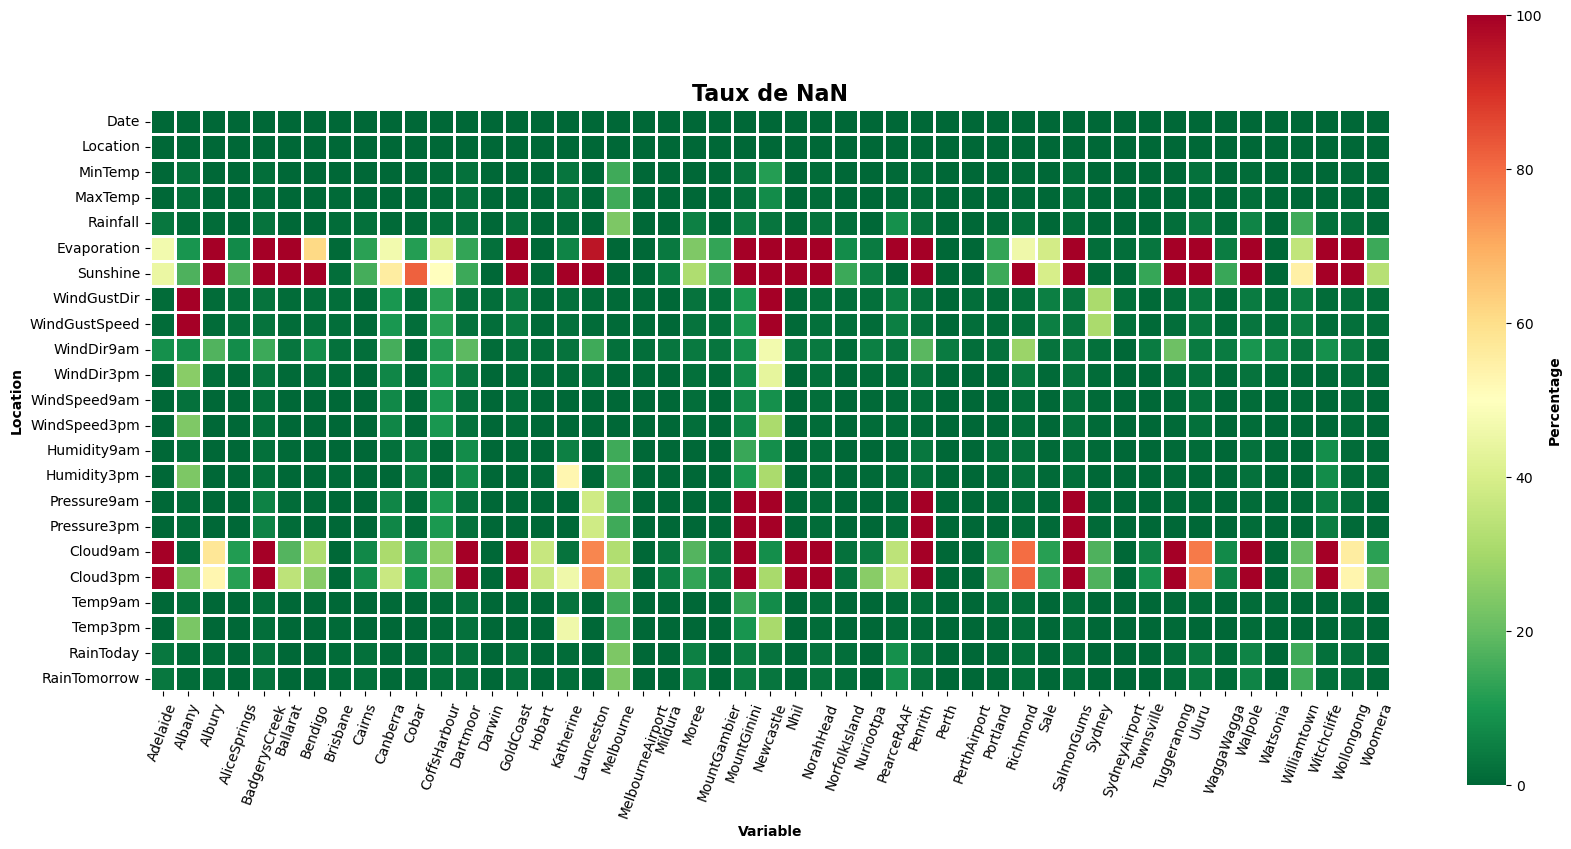

In [39]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(nan_map.T, annot = False, cmap = "RdYlGn_r", square = True, linewidth = 1, annot_kws={"size":6}, fmt=".0f", cbar_kws = {"label": "Percentage"})

## Mise en forme
plt.title("Taux de NaN", fontweight = "bold", fontsize = 16)
plt.xlabel("Variable", fontweight = "bold")
plt.ylabel("Location", fontweight = "bold")
plt.xticks(rotation = 70)
cbar_axes = ax.figure.axes[-1].yaxis.label.set_weight("bold");